<h1> 4 major problems in CV </h1>
Classification, detection(most time-consuming), segmentation, video process
Collection, detection, and *decision
<h2> Data structure </h2>
<ol>
    <li> binary image: 01 array</li>
    <li> Grey scale: 2d integer array </li>
    <li> color image: 3d (2d + color) integer array: RGB, BGR, HSV</li>
</ol>
<h2> Image processing </h2>
opencv installation on kaikeba <br>
!pip install opencv-python -i https//pypi.tuna.tsinghua.edu.cn/simple <br>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1> Exploring basics</h1>

a ----------------------------- [1, 2, 3]
(3, 3)


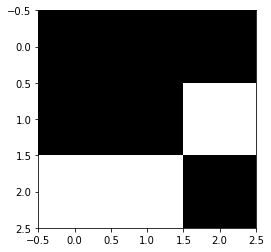

In [2]:
a=[1,2,3]
print("a", 29*'-', "%s"%(a))
img0 = np.array([[0,0,0],[0,0,1],[1,1,0]])
print(img0.shape)
plt.imshow(img0,cmap = 'gray')

In [3]:
#obtain image from video
    #cap  = cv2.VideoCapture(".../FileName.mp4")
#obtain from camera
cap = cv2.VideoCapture(0)

<h3>cv2.cvtColor()</h3> method is used to convert an image from one color space to another.

True


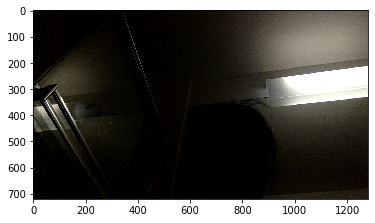

In [4]:
ret,frame = cap.read() #read next frame, ret = return_value, True if success
print(cap.isOpened()) #if VideoCapture is open
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

```
return_value = True
while return_value:
    return_value, frame = cap.read()
    print(cap.isOpened())
    plt.imshow(frame, cmap='gray')
```

In [5]:
print(frame.shape) #find shape
cap.release() #turn off capture

(720, 1280, 3)


<h2> Load image in cv2 from url </h2>
<h1> Still have problem! </h1>

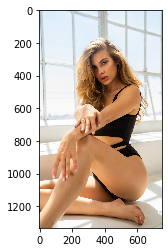

In [14]:

#obtain image from file
#img = cv2.imread("file.jpg")
#obtain image using url
from skimage import io
url = 'https://images.squarespace-cdn.com/content/v1/5b80f78fb40b9d67baaa4ab1/1568910213360-X5S6XKMHL5RP939TI2JI/ke17ZwdGBToddI8pDm48kCMflZsGmPbOje7wmTQP_bJ7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0pmy3nA_zcH46jcY3zQ1h8j9_oOwOJRBDqTCsKewmoMBj8SdD3IjF7MRjL_6nFoulQ/_DSC0937.jpg?format=750w'
img = io.imread(url)

#cv2.imshow('Window_Name', img)
#cv2.waitKey()
#cv2.destroyWindow('Window_Name')
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

(1333, 750)


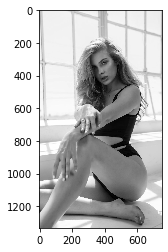

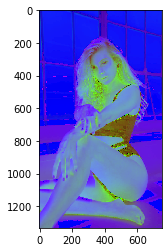

In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
print(img_gray.shape)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure()
plt.imshow(img_hsv)

<h2> Image thresholding </h2>
Convert to binary <br>
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).  <br>
Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value.<br>

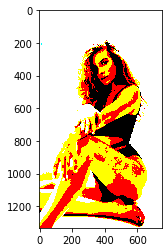

In [31]:
#make into binary
ret1,th1 =cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(th1)

<h1> Image Resize </h1>

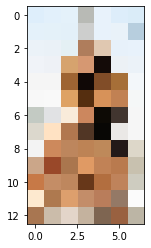

In [36]:
img_small = cv2.resize(img, (7,13))
plt.imshow(img_small)

<h1> Cropping (ROI) </h1>

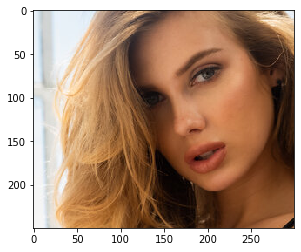

In [17]:
#roi
img_roi =img[250:500, 200:500]
plt.imshow(img_roi)

<h2> Translation transformation </h2>
create a affine transformation matrix M in homogenous coordinate:
$$
\begin{bmatrix}
1 & 0 & t_x\\
0 & 1 & t_y
\end{bmatrix}
$$
where $t_x$ and $t_y$ are motions in x and y coordinate <br>
Transoformation:$M*[x\; y\; 1]^T$ <br>
Resulting vector: $(x+t_x, y+t_y)$

<h2>warpAffine:</h2>
Parameters:	<br>
src – input image.<br>
dst – output image that has the size dsize and the same type as src .<br>
M – 2\times 3 transformation matrix.<br>
dsize – size of the output image.<br>

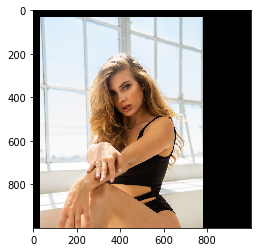

In [42]:
#move
M = np.float32([[1,0,30],[0,1,30]])
plt.imshow(cv2.warpAffine(img,M,(1000,1000)))

<h2> Rotation transformation </h2>
still using homogenous coordinate ($\theta$ colockwise):
Rotate around (0,0)
$$
\begin{bmatrix}
cos(\theta) & -sin(\theta) & 0\\
sin(\theta) & cos(\theta)  & 0
\end{bmatrix}
$$

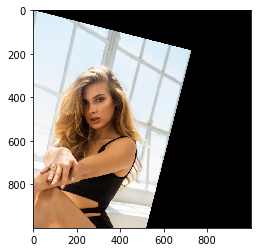

In [47]:
import math
theta = 0.25
cols=1000
rows = 1000
M = np.float32([[math.cos(theta), -math.sin(theta),0],[math.sin(theta),math.cos(theta),0]])
dst = cv2.warpAffine(img,M,(cols, rows))
plt.imshow(dst)

<h1> Sheer transformation </h1>
$$
\begin{bmatrix}
1 & s_x & 0\\
s_y & 1  & 0
\end{bmatrix}
$$

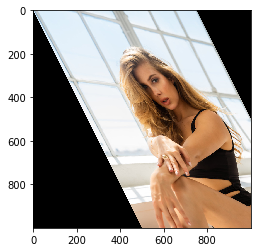

In [52]:
sx = 0.5
sy = 0
M = np.float32([[1,sx,0],[sy,1,0]])
plt.imshow(cv2.warpAffine(img,M,(1000,1000)))

<h1> Mirror transformation </h1>
$$
\begin{bmatrix}
1 & 0 & 0\\
0 & -1  & 0
\end{bmatrix}
$$

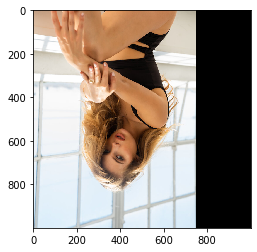

In [57]:
M = np.float32([[1,0,0],[0,-1,1000]]) #have to move in y to bring image back to ROI
plt.imshow(cv2.warpAffine(img,M,(1000,1000)))

<h1> Affine Transformation </h1>
Above transformations are all affine transformation.<br>
Rigid body: line to line

<h1> Perspective Transform </h1>
Given the distance of points to projection plane, find the corresponding location on the plane
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1  & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 1/D & 0\\
\end{bmatrix}
$$

[[ 3.01223786e-01  2.61933727e-02 -1.85711013e+01]
 [ 1.33801017e-02  3.21122440e-01 -2.16222443e+01]
 [ 6.76353865e-05 -1.70147592e-03  1.00000000e+00]]


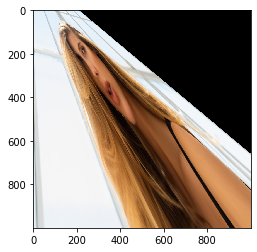

In [63]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[100,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
dst = cv2.warpPerspective(img,M,(1000,1000))
plt.imshow(dst)

<h1>Convolutional Filters </h1>
Application Process:
<ol>
    <li> Padding: add one more row/ column with 0's to the frame of the image </li>
    <li> Apply filter (eg. 3*3 filter) to the first region (3*3) of the image (element by element multiplication in the region applied then add the products together) </li>
    <li> Step forward to next region and repeat </li>
    <li> Should return a matrix with the same dimension as the imput image</li>
</ol>

<h2> Gaussian Filter </h2>
2d gaussian curve (peak in the middle, addup to 1). Blur the image. eg:
$$
\begin{bmatrix}
0.16 & 0.16 & 0.16\\
0.16 & 0.5 & 0.16\\
0.16 & 0.16 & 0.16\\
\end{bmatrix}
$$
    
    

In [71]:
def gen_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.float32)/kernel_size/kernel_size
#print(kernel)

<h2> filter2D </h2>
filter2D(src, dst, ddepth, kernel)<br>
This method accepts the following parameters −<br>

src − A Mat object representing the source (input image) for this operation.<br>
dst − A Mat object representing the destination (output image) for this operation.<br>
ddepth − A variable of the type integer representing the depth of the output image. use -1 to get automatic assignment<br>
kernel − A Mat object representing the convolution kernel.<br>

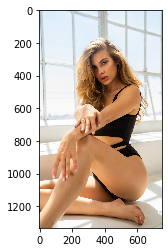

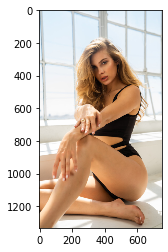

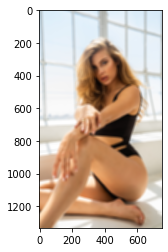

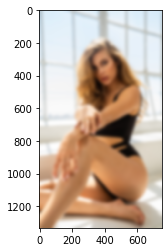

In [72]:
plt.imshow(img)
result = cv2.filter2D(img, -1, gen_kernel(3))
plt.figure()
plt.imshow(result)
#larger kernel size more blur (averaging larger area)
result = cv2.filter2D(img, -1, gen_kernel(18))
plt.figure()
plt.imshow(result)
#apply filter multiple times blurs more
result = cv2.filter2D(result, -1, gen_kernel(18))
result = cv2.filter2D(result, -1, gen_kernel(18))
plt.figure()
plt.imshow(result)

<h2> Clarify Filter (high pass) </h2>
Introduces more edge, add up to 0: 
$$
\begin{bmatrix}
-1/8 & -1/8 & -1/8\\
-1/8 & 1 & -1/8\\
-1/8 & -1/8 & -1/8\\
\end{bmatrix}
$$

<h2> Horizontal edge detector </h2>
detect vertically different adjacent pixels: 
$$
\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
$$

<h1> add watermark </h1>
<h2> Hidden watermark </h2>
img_2 = a*wm + b*img <br>
operated pixel by pixel

(300, 300, 3)


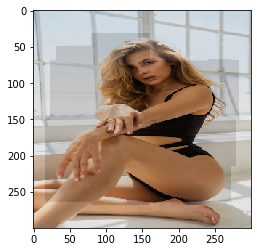

In [105]:
wm = cv2.imread("wm.png")
wm = cv2.resize(wm, (300, 300))
#wm = 255-wm
img1 = cv2.resize(img,(300,300))
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(wm.shape)
plt.imshow(cv2.add(wm,img1)) #overlay image with cv2.add
plt.imshow(cv2.addWeighted(wm, 0.1, img1, 0.8,0)) #watermark with alpha
#some problem here to load the wm.png. check next time



HW: Design a collection of filter to reduce noise